In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
# from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
# from sklearn.pipeline import make_pipeline
import itertools

## Part A: Model code


### A: 2 Implement MSE 

In [2]:
mse = lambda y_true, y_pred : np.mean((y_true-y_pred)**2)

In [3]:
#sanity check
y_true = np.random.randint(10, size=(4,))
y_pred = np.random.randint(10, size=(4,))
print('y_true:', y_true)
print('y_pred:', y_pred)
print(mse(y_true, y_pred))

from sklearn import metrics
print('expected from sklearn', metrics.mean_squared_error(y_true, y_pred))

y_true: [4 8 0 1]
y_pred: [9 8 7 5]
22.5
expected from sklearn 22.5


### A: 5. Implement Linear_Regression class

**TODO:** Explain the math here

In [45]:
def sgd(w, dw, learning_rate=1e-2):
    w -= learning_rate * dw
    return w


class Linear_Regression(object):
    def __init__(self, optim=sgd):
        self.optim = sgd
        self.params = {} #save model weights
    def predict(self, X):
        return X.dot(self.params['w']).reshape(-1) #(N,D) dot (D,1) = (N,1)
    def loss(self, X, y):
        N, D = self.X.shape
        grads = {}#return gradient for Gradient descent update
        #forward pass
        scores = self.predict(X)

        #backward pass
        loss, grads = 0.0, {}
        loss = (0.5/N) * np.sum((y-scores)**2)
        #get mse loss and dout here
        dout = (1/N) * (scores - y) 
        
        #y = wx + b -> dy/db = dout/dy * dy/db = dout * 1.0
        
        #dout/dw = dout/dy dot dy/dw = dout dot x
        #shape: (N,1) dot (N,D) -> X.T.dot(dout)
        grads['w'] = X.T.dot(dout).reshape(-1,1)
        
        #add regulirizer strength
        if self.regularizer is 'l2':
            loss += (self.lambd/N)*np.sum(self.params['w']**2)
            grads['w'] += (self.lambd/N)*self.params['w']
        elif self.regularizer is 'l1':
            loss += (self.lambd/N)*np.sum(self.param['w'])
            grads['w'] += (self.lambd/N)*(1/2) * (self.param['w']/np.abs(self.param['w'])) 
            

        return loss, grads
    def fit(self, X, Y, learning_rate=1e-1, 
                   epochs=300, tol=1e-4, regularizer='l2',
                   lambd=0.0001, verbose=False):
        '''
        Inputs:
        - X: numpy array of inputs vector  (N, D)
        - Y: numpy array of target vector (N,)
        - learning_rate: float provide the step size
        - epochs: int provide number of passes through in dataset
        - tol: float or None provide the stopping criterion
        - regularizer: string of 'l1' or 'l2'
        - lambd: float provide regularize coeff
        '''
        loss_hist = []
        self.X = X
        self.y = Y
        self.learning_rate = learning_rate
        self.regularizer = regularizer
        self.tol = tol
        self.lambd = lambd
        
        self.epochs = epochs
        
        N, D = self.X.shape
        
        self.params['w'] = np.random.randn(D,1)
        
        for e in range(self.epochs):
            loss, grads = self.loss(self.X, self.y)
            
            #perform gradient descent params update
            for p, w in self.params.items():
                dw = grads[p]
                next_w = self.optim(w, dw, self.learning_rate)
                self.params[p] = next_w
                
            if verbose: print('epoch', e, 'loss', loss)
            loss_hist.append(loss)
        return loss_hist

Sanity check 

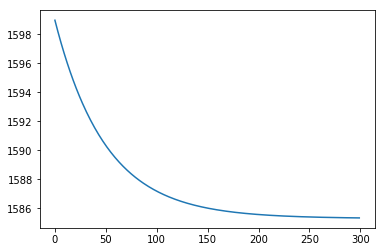

In [46]:
#sanity check
LR = Linear_Regression()
np.random.seed(10)
X = np.random.randn(1000,10)
y = np.random.randint(100, size=(1000,))
loss_hist = LR.fit(X, y, learning_rate=1e-2, verbose=False)
plt.plot(loss_hist)

### A.1: Implement polynomialFeature function

In [47]:
def polynomialFeatures(X, degree):
    '''
    Arguments:

    X : ndarray 
        A numpy array with rows representing data samples and columns representing features (d-dimensional feature).

    degree : integer
        The degree of the polynomial features. Default = 1.

    Returns:

        A new feature matrix consisting of all polynomial combinations of the features with degree equal to the specified degree. 
        For example, if an input sample is two dimensional and of the form [a, b], 
        the degree-2 polynomial features are [a, b, a2, ab, b2].
    '''
    map_terms = {}
    poly_term = []
    result_term = []
    for i in range(X.shape[1]):
        map_terms[i] = X[:,i]
        poly_term.append(i)

    terms = get_polynomial(poly_term, degree)
    result = 1
    for sublst in terms:
        for x in sublst:
            if x == 'cons':
                result *= np.ones((X.shape[0],), dtype=int)
            else:
                result *= map_terms[x] 
                
        result_term.append(result)
        result = 1
    
    return np.array(result_term).T

def get_polynomial(vars, degree):

    vars.append("cons") # add dummy variable
    
    # compute all combinations of variables
    terms = []
    for x in itertools.combinations_with_replacement(vars, degree):
        terms.append(x)

    # get rid of "c" terms
    terms = map(list, terms)
    terms = list(terms)
 
    return terms

In [48]:
#sanity check
X = np.array([
    [2,3,4],
    [1,2,2]
])
y = np.array([0,3])

print('''
Example of get_polynomial() function.
This will return combinatoric of n between 2 variables''')
display(get_polynomial(['x1', 'x2', 'x3'], 3))
print("polynomial features")
print(polynomialFeatures(X, 2))

print('''
\n__________Expected from Sklearn________
Note: here our result does math with sklearn, 
order are mixed. but SGD keep order consistence
when training.
''')
poly = preprocessing.PolynomialFeatures(2)
poly.fit_transform(X)


Example of get_polynomial() function.
This will return combinatoric of n between 2 variables


[['x1', 'x1', 'x1'],
 ['x1', 'x1', 'x2'],
 ['x1', 'x1', 'x3'],
 ['x1', 'x1', 'cons'],
 ['x1', 'x2', 'x2'],
 ['x1', 'x2', 'x3'],
 ['x1', 'x2', 'cons'],
 ['x1', 'x3', 'x3'],
 ['x1', 'x3', 'cons'],
 ['x1', 'cons', 'cons'],
 ['x2', 'x2', 'x2'],
 ['x2', 'x2', 'x3'],
 ['x2', 'x2', 'cons'],
 ['x2', 'x3', 'x3'],
 ['x2', 'x3', 'cons'],
 ['x2', 'cons', 'cons'],
 ['x3', 'x3', 'x3'],
 ['x3', 'x3', 'cons'],
 ['x3', 'cons', 'cons'],
 ['cons', 'cons', 'cons']]

polynomial features
[[ 4  6  8  2  9 12  3 16  4  1]
 [ 1  2  2  1  4  4  2  4  2  1]]


__________Expected from Sklearn________
Note: here our result does math with sklearn, 
order are mixed. but SGD keep order consistence
when training.



array([[ 1.,  2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.],
       [ 1.,  1.,  2.,  2.,  1.,  2.,  2.,  4.,  4.,  4.]])

### A: 4. IMplemeent plot polynomial model complexity

In [8]:
def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    '''
    Arguments:
        model : object type that implements the “fit” and “predict” methods. An object of that type which is 
        cloned for each validation.
        
        X: ndarray A numpy array with rows representing data samples and columns representing features.
        
        Y: ndarplot_polynomial_model_complexity(LinearRegression(), X_train, y_train, 5, 5, learning_rate=0.01,
        epochs=1000, tol=None, regularizer=None, lambd=0.0)ray A 1D numpy array with labels corresponding to 
        each row of the feature matrix X.
        
        cv : int integer, to specify the number of folds in a (Stratified) K-Fold,
        
        maxPolynomialDegree: int It will be used to determine the maximum polynomial degree for X. 
            For example, if it is set to 3, then the function will compute both the training and 
            validation mse values for degree 1, 2 and 3.
            
        learning_rate: float It provides the step size for parameter update.
        
        epochs: int The maximum number of passes over the training data for updating the weight vector.
        
        tol: float or None The stopping criterion. If it is not None, the iterations will stop when (error> 
        previous_error-tol).If it is None, the number of iterations will be set by the “epochs”.
            
        regularizer: string The string value could be one of the following: l1, l2, None. 
            If it’s set to None, the cost function without the regularization term will be used for computing 
            the gradientand updating the weight vector. However, if it’s set to l1 or l2, the appropriate 
            regularized cost function needs to be used for computing the gradient and updating the weight vector.
            
        lambd: float It provides theregularization coefficient.It is used only when the “regularizer” is set to l1 or l2.
        
    Returns:
        There is no return value. This function plots the root-mean-square error (rmse) values for both the training set 
        and the validation set for degree of X between 1 and maxPolynomialDegree.
    '''
    degree_list = []
    train_scores = []
    val_scores = []
    for i in range(1, maxPolynomialDegree + 1):
        degree_list.append(i)
        X_poly = polynomialFeatures(X, i)
        x_train_folds = np.array(np.array_split(X_poly, cv))
        y_train_folds = np.array(np.array_split(Y, cv))

        train_score = 0
        val_score = 0
        for idx, val_fold in enumerate(x_train_folds):
            train_folds = [f for i, f in enumerate(x_train_folds) if(i != idx)][0] #[0]: unpacking the outer list
            label_folds = [f for i, f in enumerate(y_train_folds) if(i != idx)][0]
            
            model.fit(train_folds, label_folds)

            train_pred = model.predict(train_folds)
            val_pred = model.predict(val_fold)

            train_score += mse(label_folds, train_pred)
            val_score += mse(y_train_folds[idx], val_pred)
            
        train_scores.append(train_score/cv)
        val_scores.append(val_score/cv)
        
    plt.figure(figsize=(10, 6))   
    plt.plot(degree_list, np.sqrt(val_scores), "ro-", alpha=1.0, linewidth=1.0, label="Cross val RMSE")
    plt.plot(degree_list, np.sqrt(train_scores), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")    
    plt.legend(loc="best", fontsize=14) 
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.title("RMSE for Varying Degree")
    plt.show()
    return train_scores, val_scores

_____________Implemented___________


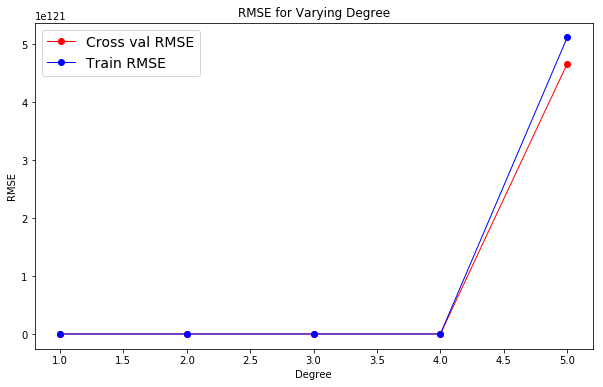


______________Sklearn_______________


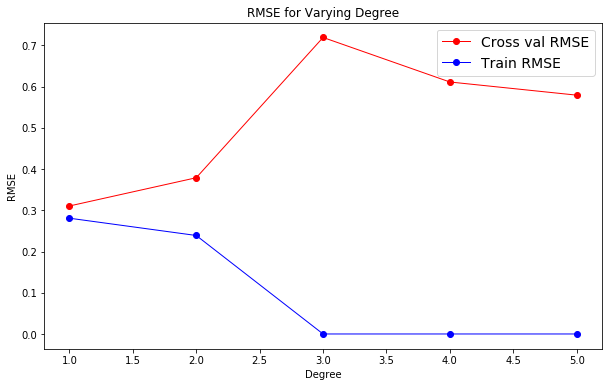

In [162]:
X_train_ = np.random.rand(1000,10)
y_train_ = np.random.rand(1000)

print("_____________Implemented___________")
_, _ = plot_polynomial_model_complexity(Linear_Regression(), X_train_, y_train_, 5, 5, 
                                 learning_rate=0.01, epochs=1000, tol=None, 
                                 regularizer=None, lambd=0.0)

print('\n______________Sklearn_______________')
_, _ = plot_polynomial_model_complexity(linear_model.LinearRegression(), X_train_, y_train_, 5, 5, 
                                 learning_rate=0.01, epochs=1000, tol=None, 
                                 regularizer=None, lambd=0.0)

### A: 3. Learning curve

In [34]:
def learning_curve(model, X, Y, cv, train_size=np.linspace(0.1, 1.0, 10), learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    '''
    Arguments: 
    - model: object type that implements the “fit” and “predict” methods. An object of that type which is cloned for each validation.
    - X: ndarray A numpy array with rows representing data samples and columns representing features.
    - Y: ndarray A 1D numpy array with labels corresponding to each row of the feature matrix X.
    - cv : int integer, to specify the number of folds in a k-fold cross-validation.
    - train_sizes : intor float Relative or absolute numbers of training examples that will be used to generate the learning curve. 
        If the dtype is float, it is regarded as a fraction of the maximum size of the training set 
        (that is determined by the selected validation method), i.e. it has to be within (0, 1]. 
        Otherwise it is interpreted as absolute sizes of the training sets. 
    - epochs :int The maximum number of passes over the training data for updating the weight vector.
    -tol : float or None The stopping criterion. If it is not None, the iterations will stop when (error> previous_error-tol). 
         If it is None, the number of iterations will be set by the “epochs”.
    - regularizer: string The string value could be one of the following: l1, l2, None. 
        If it’s set to None, the cost function without the regularization term will be used for computing the gradient 
        and updating the weight vector. However, if it’s set to l1 or l2, the appropriate regularized cost function needs to be used 
        for computing the gradient and updating the weight vector.
    - lambd: floatIt provides the regularization coefficient. It is used only when the “regularizer” is set to l1 or l2.
    Returns:
    - train_scores : ndarray root-mean-square error(rmse) values on training sets.
    - val_scores : ndarray root-mean-square error(rmse) values on validation sets.    
    '''
#edge case: value of cv must be more than sample size/ cannot be 1
    import math
    
    N, D = X.shape
    train_scores = []
    val_scores = []
    
    for step in train_size:
        cur_X = X[0:int(step*N)]
        cur_Y = Y[0:int(step*N)]
        x_train_folds = np.array(np.array_split(cur_X, cv))
        y_train_folds = np.array(np.array_split(cur_Y, cv))
        
        train_score = 0
        val_score = 0
        for idx, val_fold in enumerate(x_train_folds):
            train_folds = [f for i, f in enumerate(x_train_folds) if(i != idx)][0] #[0]: unpacking the outer list
            label_folds = [f for i, f in enumerate(y_train_folds) if(i != idx)][0]

            # Train the model
            model.fit(train_folds, label_folds)

            train_pred = model.predict(train_folds)
            val_pred = model.predict(val_fold)

            train_score += (mse(label_folds, train_pred))
            val_score += (mse(y_train_folds[idx], val_pred))
            
        train_scores.append(train_score/cv)
        val_scores.append(val_score/cv)
    
    return np.sqrt(train_scores), np.sqrt(val_scores)

[0.24618641 0.27699316 0.26949482 0.27813958 0.27219385 0.27715614
 0.28070988 0.28641441 0.28866039 0.28236889] [0.31479189 0.31038762 0.3202737  0.31317229 0.32343933 0.32018952
 0.30243188 0.30820342 0.31871313 0.30703864]


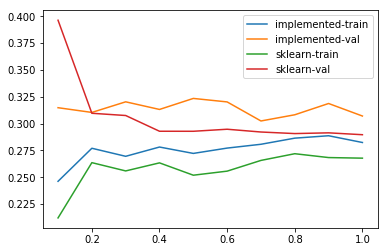


________Result discussion________
Here result is as expected. Observing the implemented-train and sklearn-train 
are diminishing in at the same rate and in the same direction. 
Since Sklearn LinearRegression.fit is implemented using OLS this result
in an optimal solution. Our implementation is Gradient optimizing base
therefore, our MSE score is higher.



In [56]:
#Sanity check
X_train_ = np.random.rand(1000,10)
y_train_ = np.random.rand(1000)
a, b =learning_curve(Linear_Regression(), X_train_, y_train_, 5, 
                     learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0)
print(a, b)

plt.plot(np.linspace(0.1, 1.0, 10),a, label='implemented-train')
plt.plot(np.linspace(0.1, 1.0, 10),b, label='implemented-val')

from sklearn import linear_model
a, b = learning_curve(linear_model.LinearRegression(), X_train_, y_train_, 5, 
                      learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0)
plt.plot(np.linspace(0.1, 1.0, 10),a, label='sklearn-train')
plt.plot(np.linspace(0.1, 1.0, 10),b, label='sklearn-val')
plt.legend()
plt.show()

print('''
________Result discussion________
Here result is as expected. Observing the implemented-train and sklearn-train 
are diminishing in at the same rate and in the same direction. 
Since Sklearn LinearRegression.fit is implemented using OLS this result
in an optimal solution. Our implementation is Gradient optimizing base
therefore, our MSE score is higher.
''')

Implemented MSE 0.08342448826508195
SKlearn MSE  0.05502934270413138


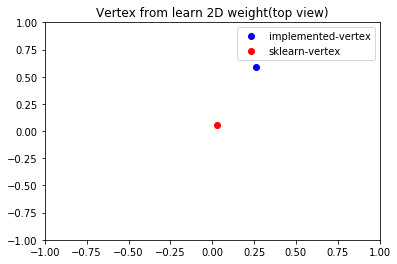

In [319]:
#Sanity check
X_train_ = np.random.rand(1000,2)
y_train_ = np.random.rand(1000)

X_val_ = np.random.rand(5,2)
y_val_ = np.random.rand(5)

LR = Linear_Regression()

# mean_dim = np.mean(X_train_, axis=0)
# std_dim = np.std(X_train_, axis=0)

# X_train_ = (X_train_ - mean_dim)/std_dim

loss_hist = LR.fit(X_train_, y_train_, learning_rate=1e-1, 
                   epochs=100, regularizer='l2',
                   lambd=0.0001)
pred_implemented = LR.predict(X_val_)

LR_sklearn = linear_model.SGDRegressor(loss='squared_loss',penalty='l2',tol=1e-2, 
                                       alpha=1e-1, max_iter=100)
_ = LR_sklearn.fit(X_train_, y_train_)
pred_sk = LR_sklearn.predict(X_val_)

print('Implemented MSE', mse(pred_implemented, y_val_))
print('SKlearn MSE ',mse(pred_sk, y_val_))

plt.title("Vertex from learn 2D weight(top view)")
plt.plot(LR.params['w'][0], LR.params['w'][1], 'bo', label='implemented-vertex')
plt.plot(LR_sklearn.coef_[0], LR_sklearn.coef_[1], 'ro', label='sklearn-vertex')
plt.legend()
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.show()

In [407]:
#this check tell how frequen does our metrics got off base on sklearn
def syn_prob(time=100):
    implement_win = 0
    sklearn_win = 0
    avg_diff = 0.0
    for t in range(time):
        X_train_ = np.random.rand(1000,2)
        y_train_ = np.random.rand(1000)

        X_val_ = np.random.rand(5,2)
        y_val_ = np.random.rand(5)

        LR = Linear_Regression()

        # mean_dim = np.mean(X_train_, axis=0)
        # std_dim = np.std(X_train_, axis=0)

        # X_train_ = (X_train_ - mean_dim)/std_dim

        loss_hist = LR.fit(X_train_, y_train_, learning_rate=1e-1, 
                           epochs=100, regularizer='l2',
                           lambd=0.0001)
        pred_implemented = LR.predict(X_val_)

        LR_sklearn = linear_model.SGDRegressor(loss='squared_loss',penalty='l2',tol=1e-2, 
                                               alpha=1e-1, max_iter=100)
        _ = LR_sklearn.fit(X_train_, y_train_)
        pred_sk = LR_sklearn.predict(X_val_)

        iml = mse(pred_implemented, y_val_)
        skl = mse(pred_sk, y_val_)
        if iml < skl: 
            implement_win+=1 
        else: 
            sklearn_win+=1 
            avg_diff += abs(abs(iml) - abs(skl) )/ abs(iml)*100
            
    print("Implemented win", implement_win/time,'%oftimes', ' with avg_diff', avg_diff/sklearn_win, '%')
    print("Sklearn win", sklearn_win/time)

syn_prob(time=100)

Implemented win 0.18 %oftimes  with avg_diff 41.9086189081677 %
Sklearn win 0.82
